Phuong Ngo

USC ID: 8312646237

In [1]:
import pandas as pd
import numpy as np

I was going to read the csv file by file and then concat them all into a dataframe. However that would not show me which instance is which, plus it's time consuming to copy and paste all in. I figured I can use a for loop for this and then append them into a list. I looked for a solution on stackoverflow and found someone did something similar in a for loop, so I tweaked mine so that i dont have to use glob

source: https://stackoverflow.com/questions/42407976/loading-multiple-text-files-from-a-folder-into-a-python-list-variable

In [2]:
columns = ["time", "avg_rss12", "var_rss12","avg_rss13","var_rss13","avg_rss23","var_rss23"]
folders = ["bending1","bending2","cycling","lying","sitting","standing","walking"]
instance_cnt = [7,6,15,15,15,15,15]
instances = []
train_instances = []
test_instances = []

for i in range(len(folders)):
    for j in range(instance_cnt[i]):
        path = '/Users/phuongqn/Desktop/INF552/Homework/Homework 3 Data/AReM/'+folders[i]+'/dataset'+str(j+1)+'.csv'
        d = pd.read_csv(path, header=4, names=columns)
        instances.append(d)
print(len(instances))

for i in range(len(instances)):
    if instances[i].isnull().sum().any() > 0:
        print('Instance number',i)
        print(instances[i].isnull())

88
Instance number 10
      time  avg_rss12  var_rss12  avg_rss13  var_rss13  avg_rss23  var_rss23
0    False       True       True       True       True       True       True
1    False       True       True       True       True       True       True
2    False       True       True       True       True       True       True
3    False       True       True       True       True       True       True
4    False       True       True       True       True       True       True
5    False       True       True       True       True       True       True
6    False       True       True       True       True       True       True
7    False       True       True       True       True       True       True
8    False       True       True       True       True       True       True
9    False       True       True       True       True       True       True
10   False       True       True       True       True       True       True
11   False       True       True       True       True

I know before hand that dataset 4 in bending2 has a problem, and while reading all the data i ran into a problem with dataset 9 and 12 if i remember correctly from folder cycling with them having an extra blank cell in the last row. I fix the latter in excel and the former below. After creating a dataframe, I didn't know that all values in there are objects, so I had to turn them into floats and int to match other instances.

In [3]:
p=instances[10].time.str.split(' ', 6, expand=True)
p.columns=["time", "avg_rss12", "var_rss12","avg_rss13","var_rss13","avg_rss23","var_rss23"]
p['time'] = p['time'].astype(int)
p['avg_rss12'] = p['avg_rss12'].astype(float)
p['var_rss12'] = p['var_rss12'].astype(float)
p['avg_rss13'] = p['avg_rss13'].astype(float)
p['var_rss13'] = p['var_rss13'].astype(float)
p['avg_rss23'] = p['avg_rss23'].astype(float)
p['var_rss23'] = p['var_rss23'].astype(float)

instances[10]=p

instances

[       time  avg_rss12  var_rss12  avg_rss13  var_rss13  avg_rss23  var_rss23
 0         0      39.25       0.43      22.75       0.43      33.75       1.30
 1       250      39.25       0.43      23.00       0.00      33.00       0.00
 2       500      39.25       0.43      23.25       0.43      33.00       0.00
 3       750      39.50       0.50      23.00       0.71      33.00       0.00
 4      1000      39.50       0.50      24.00       0.00      33.00       0.00
 5      1250      39.25       0.43      24.00       0.00      33.00       0.00
 6      1500      39.25       0.43      24.00       0.00      33.00       0.00
 7      1750      39.00       0.00      23.75       0.43      33.00       0.00
 8      2000      39.50       0.50      24.00       0.00      33.00       0.00
 9      2250      39.50       0.50      23.00       0.00      33.00       0.00
 10     2500      39.50       0.50      23.25       0.43      33.00       0.00
 11     2750      39.50       0.50      23.50       

In [55]:
train_instances=instances[2:7]+ instances[9:13]+ instances[16:28]+ instances[31:43]+ instances[46:58]+ instances[61:73]+ instances[76:88]
test_instances= instances[0:2]+ instances[7:9]+ instances[13:16]+ instances[28:31]+ instances[43:46]+ instances[58:61]+ instances[73:76]

In [4]:
p.astype(int).describe()

,time,avg_rss12,var_rss12,avg_rss13,var_rss13,avg_rss23,var_rss23
count,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000
mean,59875.000000,29.650000,0.006250,7.883333,0.210417,17.770833,0.212500
std,34677.081769,1.138801,0.078892,3.412328,0.588242,1.779489,0.505347
min,0.000000,27.000000,0.000000,0.000000,0.000000,11.000000,0.000000
25%,29937.500000,29.000000,0.000000,5.000000,0.000000,17.000000,0.000000
50%,59875.000000,30.000000,0.000000,8.000000,0.000000,18.000000,0.000000
75%,89812.500000,30.000000,0.000000,11.000000,0.000000,19.000000,0.000000
max,119750.000000,33.000000,1.000000,14.000000,4.000000,23.000000,6.000000


In [5]:
features= []

for i in range(len(instances)):
    a = instances[i]
    f=[]
    for column in a:
        minimum=a[column].describe()['min']
        maximum=a[column].describe()['max']
        mean=a[column].describe()['mean']
        median=a[column].describe()['50%']
        std=a[column].describe()['std']
        first_qrt=a[column].describe()['25%']
        third_qrt=a[column].describe()['75%']
        
        f.append(minimum)
        f.append(maximum)
        f.append(mean)
        f.append(median)
        f.append(std)
        f.append(first_qrt)
        f.append(third_qrt)
    features.append(f)
df=pd.DataFrame(features, columns=['min', 'max', 'mean', 'median','std','1st quart','3rd quart',
                                   'min1', 'max1', 'mean1', 'median1','std1','1st quart1','3rd quart1',
                                   'min2', 'max2', 'mean2', 'median2','std2','1st quart2','3rd quart2',
                                   'min3', 'max3', 'mean3', 'median3','std3','1st quart3','3rd quart3',
                                   'min4', 'max4', 'mean4', 'median4','std4','1st quart4','3rd quart4',
                                   'min5', 'max5', 'mean5', 'median5','std5','1st quart5','3rd quart5',
                                   'min6', 'max6', 'mean6', 'median6','std6','1st quart6','3rd quart6'])

In [6]:
df=df.drop(columns=['min', 'max', 'mean', 'median','std','1st quart','3rd quart'])
df

,min1,max1,mean1,median1,std1,1st quart1,3rd quart1,min2,max2,mean2,...,std5,1st quart5,3rd quart5,min6,max6,mean6,median6,std6,1st quart6,3rd quart6
0,37.25,45.00,40.624792,40.500,1.476967,39.2500,42.0000,0.0,1.30,0.358604,...,2.188449,33.0000,36.0000,0.00,1.92,0.570583,0.430,0.582915,0.0000,1.3000
1,38.00,45.67,42.812812,42.500,1.435550,42.0000,43.6700,0.0,1.22,0.372438,...,1.995255,32.0000,34.5000,0.00,3.11,0.571083,0.430,0.601010,0.0000,1.3000
2,35.00,47.40,43.954500,44.330,1.558835,43.0000,45.0000,0.0,1.70,0.426250,...,1.999604,35.3625,36.5000,0.00,1.79,0.493292,0.430,0.513506,0.0000,0.9400
3,33.00,47.75,42.179813,43.500,3.670666,39.1500,45.0000,0.0,3.00,0.696042,...,3.849448,30.4575,36.3300,0.00,2.18,0.613521,0.500,0.524317,0.0000,1.0000
4,33.00,45.75,41.678063,41.750,2.243490,41.3300,42.7500,0.0,2.83,0.535979,...,2.411026,28.4575,31.2500,0.00,1.79,0.383292,0.430,0.389164,0.0000,0.5000
5,37.00,48.00,43.454958,43.250,1.386098,42.5000,45.0000,0.0,1.58,0.378083,...,2.488862,22.2500,24.0000,0.00,5.26,0.679646,0.500,0.622534,0.4300,0.8700
6,36.25,48.00,43.969125,44.500,1.618364,43.3100,44.6700,0.0,1.50,0.413125,...,3.318301,20.5000,23.7500,0.00,2.96,0.555313,0.490,0.487826,0.0000,0.8300
7,12.75,51.00,24.562958,24.250,3.737514,23.1875,26.5000,0.0,6.87,0.590833,...,3.693786,20.5000,27.0000,0.00,4.97,0.700188,0.500,0.693720,0.4300,0.8700
8,0.00,42.75,27.464604,28.000,3.583582,25.5000,30.0000,0.0,7.76,0.449708,...,5.053642,15.0000,20.7500,0.00,6.76,1.122125,0.830,1.012342,0.4700,1.3000
9,21.00,50.00,32.586208,33.000,6.238143,26.1875,34.5000,0.0,9.90,0.516125,...,5.032424,17.6700,23.5000,0.00,13.61,1.162042,0.830,1.332980,0.4700,1.3000


In [7]:
est_std=df.std()
import bootstrapped.bootstrap as bs
import bootstrapped.stats_functions as bs_stats
std_rslt = pd.DataFrame(est_std,columns=["Estimated Standard Deviation"])
for column in df:
    bs_results = bs.bootstrap(df[column].values,stat_func = bs_stats.std, num_iterations=100, alpha=0.1)
    std_rslt.loc[column,"Bootstrapped Standard Deviation"] = bs_results.value
    std_rslt.loc[column,"Upper Bound"] = bs_results.upper_bound
    std_rslt.loc[column,"Lower Bound"] = bs_results.lower_bound
std_rslt


,Estimated Standard Deviation,Bootstrapped Standard Deviation,Upper Bound,Lower Bound
min1,9.569975,9.515445,10.765712,8.323020
max1,4.394362,4.369322,5.382920,3.530493
mean1,5.335718,5.305314,6.076135,4.841555
median1,5.440054,5.409056,6.106110,4.758940
std1,1.772153,1.762056,1.999576,1.573633
1st quart1,6.153590,6.118526,6.669080,5.693741
3rd quart1,5.138925,5.109643,5.828899,4.336281
min2,0.000000,0.000000,0.000000,0.000000
max2,5.062729,5.033882,5.418069,4.725031
mean2,1.574164,1.565194,1.754600,1.463993


In [8]:
from sklearn import preprocessing

names = df.columns
scaler = preprocessing.StandardScaler()
scaled_df = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_df, columns=names)
scaled_df

,min1,max1,mean1,median1,std1,1st quart1,3rd quart1,min2,max2,mean2,...,std5,1st quart5,3rd quart5,min6,max6,mean6,median6,std6,1st quart6,3rd quart6
0,0.863154,-0.108270,0.321835,0.303804,-0.858047,0.364495,0.157112,0.0,-0.991305,-0.703117,...,-1.324069,3.162999,3.176573,-0.107211,-1.813459,-0.914539,-0.940042,-0.904695,-1.195895,-0.556211
1,0.941973,0.045071,0.734255,0.673555,-0.881551,0.813949,0.483945,0.0,-1.007198,-0.694279,...,-1.513650,2.998030,2.903856,-0.107211,-1.338327,-0.914104,-0.940042,-0.869538,-1.195895,-0.556211
2,0.626696,0.441014,0.949452,1.011876,-0.811585,0.977387,0.744237,0.0,-0.911844,-0.659898,...,-1.509382,3.552740,3.267479,-0.107211,-1.865364,-0.981853,-0.940042,-1.039558,-1.195895,-0.793848
3,0.416512,0.521118,0.614941,0.858430,0.386919,0.348151,0.744237,0.0,-0.653594,-0.487529,...,0.305867,2.743564,3.236571,-0.107211,-1.709649,-0.877145,-0.875244,-1.018552,-1.195895,-0.754241
4,0.416512,0.063381,0.520366,0.534898,-0.423030,0.704446,0.303893,0.0,-0.687365,-0.589792,...,-1.105654,2.413625,2.312968,-0.107211,-1.865364,-1.077652,-0.940042,-1.281154,-1.195895,-1.084292
5,0.836881,0.578335,0.855294,0.812211,-0.909616,0.895668,0.744237,0.0,-0.935682,-0.690672,...,-1.029274,1.389577,0.994835,-0.107211,-0.479896,-0.819556,-0.875244,-0.827717,-0.625800,-0.840055
6,0.758062,0.578335,0.952209,1.043305,-0.777801,1.028053,0.679653,0.0,-0.951575,-0.668284,...,-0.215347,1.100881,0.949382,-0.107211,-1.398218,-0.927839,-0.884501,-1.089454,-1.195895,-0.866459
7,-1.711607,1.264940,-2.705664,-2.700416,0.424857,-2.260729,-2.876369,0.0,0.115197,-0.554746,...,0.153116,1.100881,1.540269,-0.107211,-0.595684,-0.801667,-0.875244,-0.689402,-0.625800,-0.840055
8,-3.051534,-0.623224,-2.158732,-2.007135,0.337498,-1.882778,-2.191389,0.0,0.291999,-0.644910,...,1.487541,0.193549,0.403947,-0.107211,0.119010,-0.434199,-0.569768,-0.070320,-0.572768,-0.556211
9,-0.844596,1.036072,-1.193360,-1.082759,1.844012,-1.770415,-1.310701,0.0,0.717118,-0.602477,...,1.466720,0.634017,0.903929,-0.107211,2.854012,-0.399436,-0.569768,0.552680,-0.572768,-0.556211


In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

df['class']= 0
for i in range(len(df)):
    if i<=12:
        df.at[i, 'class'] = 1
    else:
        df.at[i, 'class']=0
scaled_df['class']= 0
for i in range(len(scaled_df)):
    if i<=12:
        scaled_df.at[i, 'class'] = 1
    else:
        scaled_df.at[i, 'class']=0
print(scaled_df.head(5))
print(df.head(5))

       min1      max1     mean1   median1      std1  1st quart1  3rd quart1  \
0  0.863154 -0.108270  0.321835  0.303804 -0.858047    0.364495    0.157112   
1  0.941973  0.045071  0.734255  0.673555 -0.881551    0.813949    0.483945   
2  0.626696  0.441014  0.949452  1.011876 -0.811585    0.977387    0.744237   
3  0.416512  0.521118  0.614941  0.858430  0.386919    0.348151    0.744237   
4  0.416512  0.063381  0.520366  0.534898 -0.423030    0.704446    0.303893   

   min2      max2     mean2  ...  1st quart5  3rd quart5      min6      max6  \
0   0.0 -0.991305 -0.703117  ...    3.162999    3.176573 -0.107211 -1.813459   
1   0.0 -1.007198 -0.694279  ...    2.998030    2.903856 -0.107211 -1.338327   
2   0.0 -0.911844 -0.659898  ...    3.552740    3.267479 -0.107211 -1.865364   
3   0.0 -0.653594 -0.487529  ...    2.743564    3.236571 -0.107211 -1.709649   
4   0.0 -0.687365 -0.589792  ...    2.413625    2.312968 -0.107211 -1.865364   

      mean6   median6      std6  1st quart6 

pick mean, median and 3rd quartile

//anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
//anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


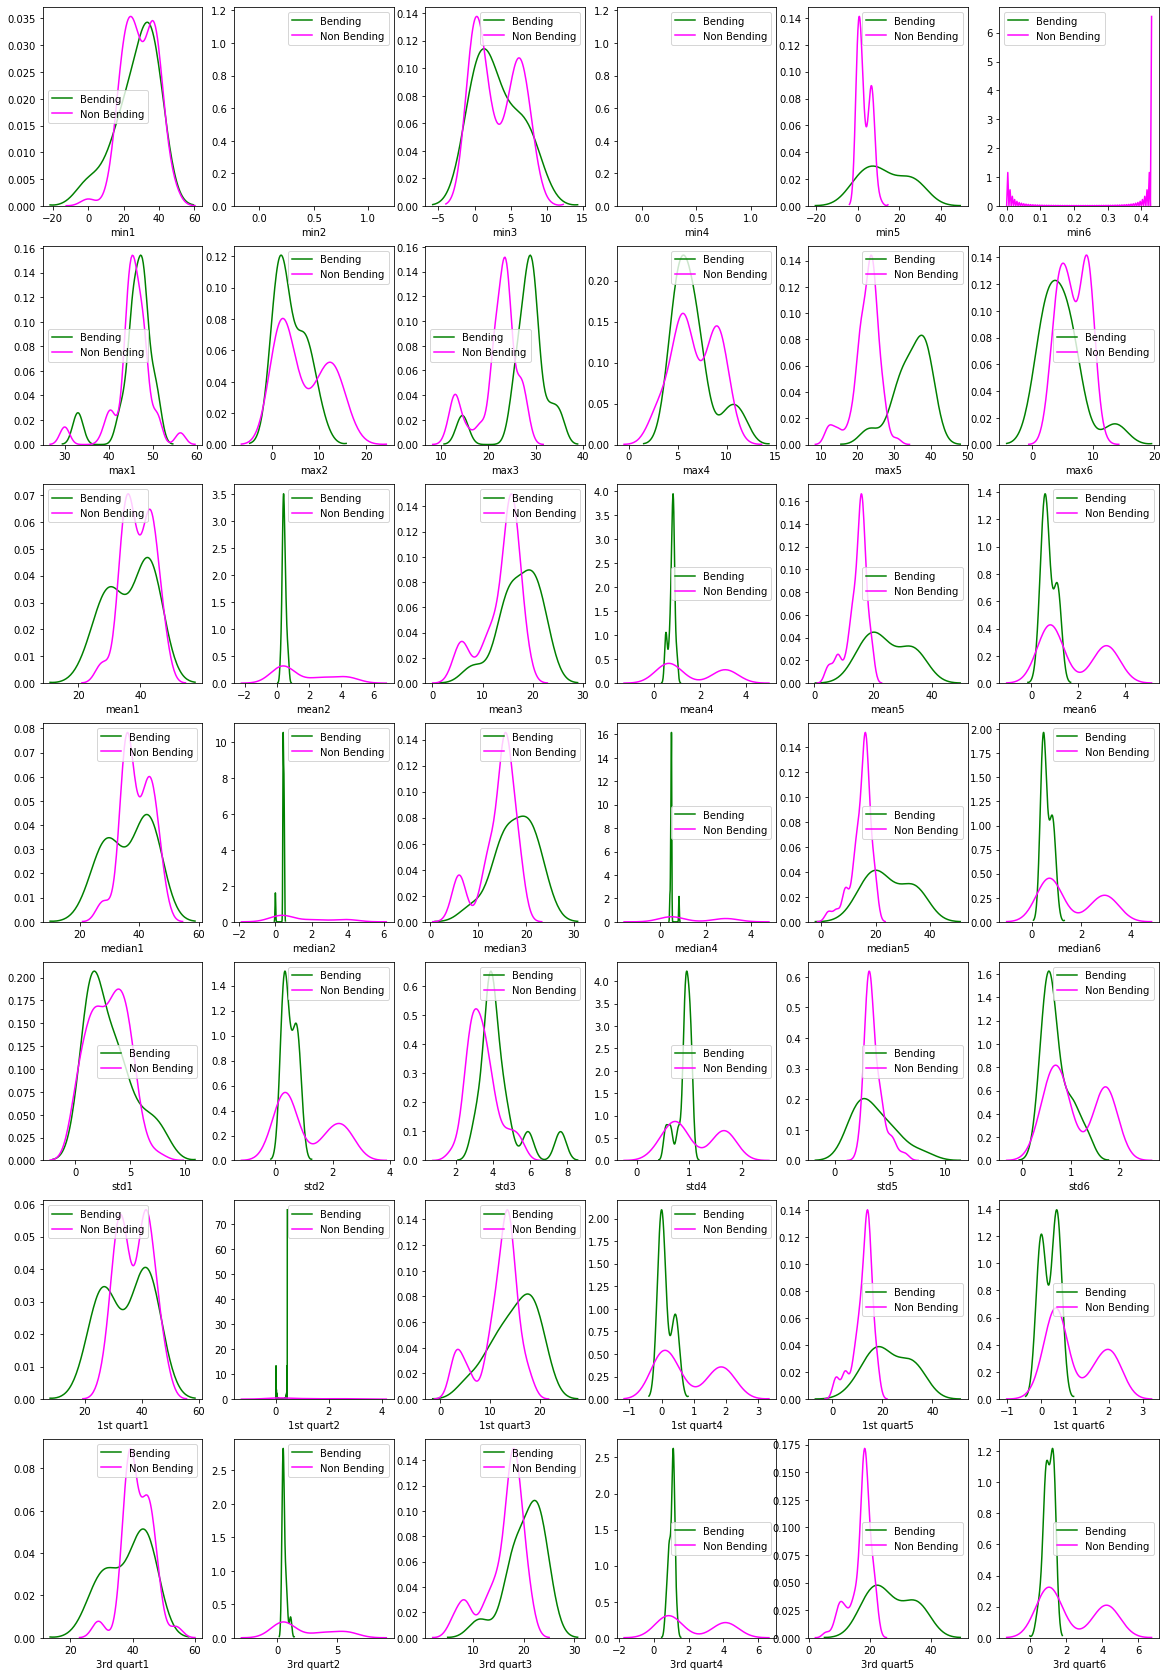

In [10]:
bending = df[df['class'] == 1]
nonbending = df[df['class'] == 0]
features = ["min","max","mean","median","std","1st quart","3rd quart"]
fig,axes = plt.subplots(nrows=7,ncols=6,figsize=(20,30))
for j in range(6):
    for i in range(len(features)):
        ax = axes[i,j]
        string = features[i]+str(j+1)
        b = np.array(bending[string])
        nb = np.array(nonbending[string])
        sns.distplot(b, hist=False, color='green', kde=True, rug=False, ax=axes[i,j], label='Bending');
        sns.distplot(nb, hist=False, color='magenta', kde=True, rug=False, ax=axes[i,j], label='Non Bending');
        ax.set(xlabel=string)
plt.show()


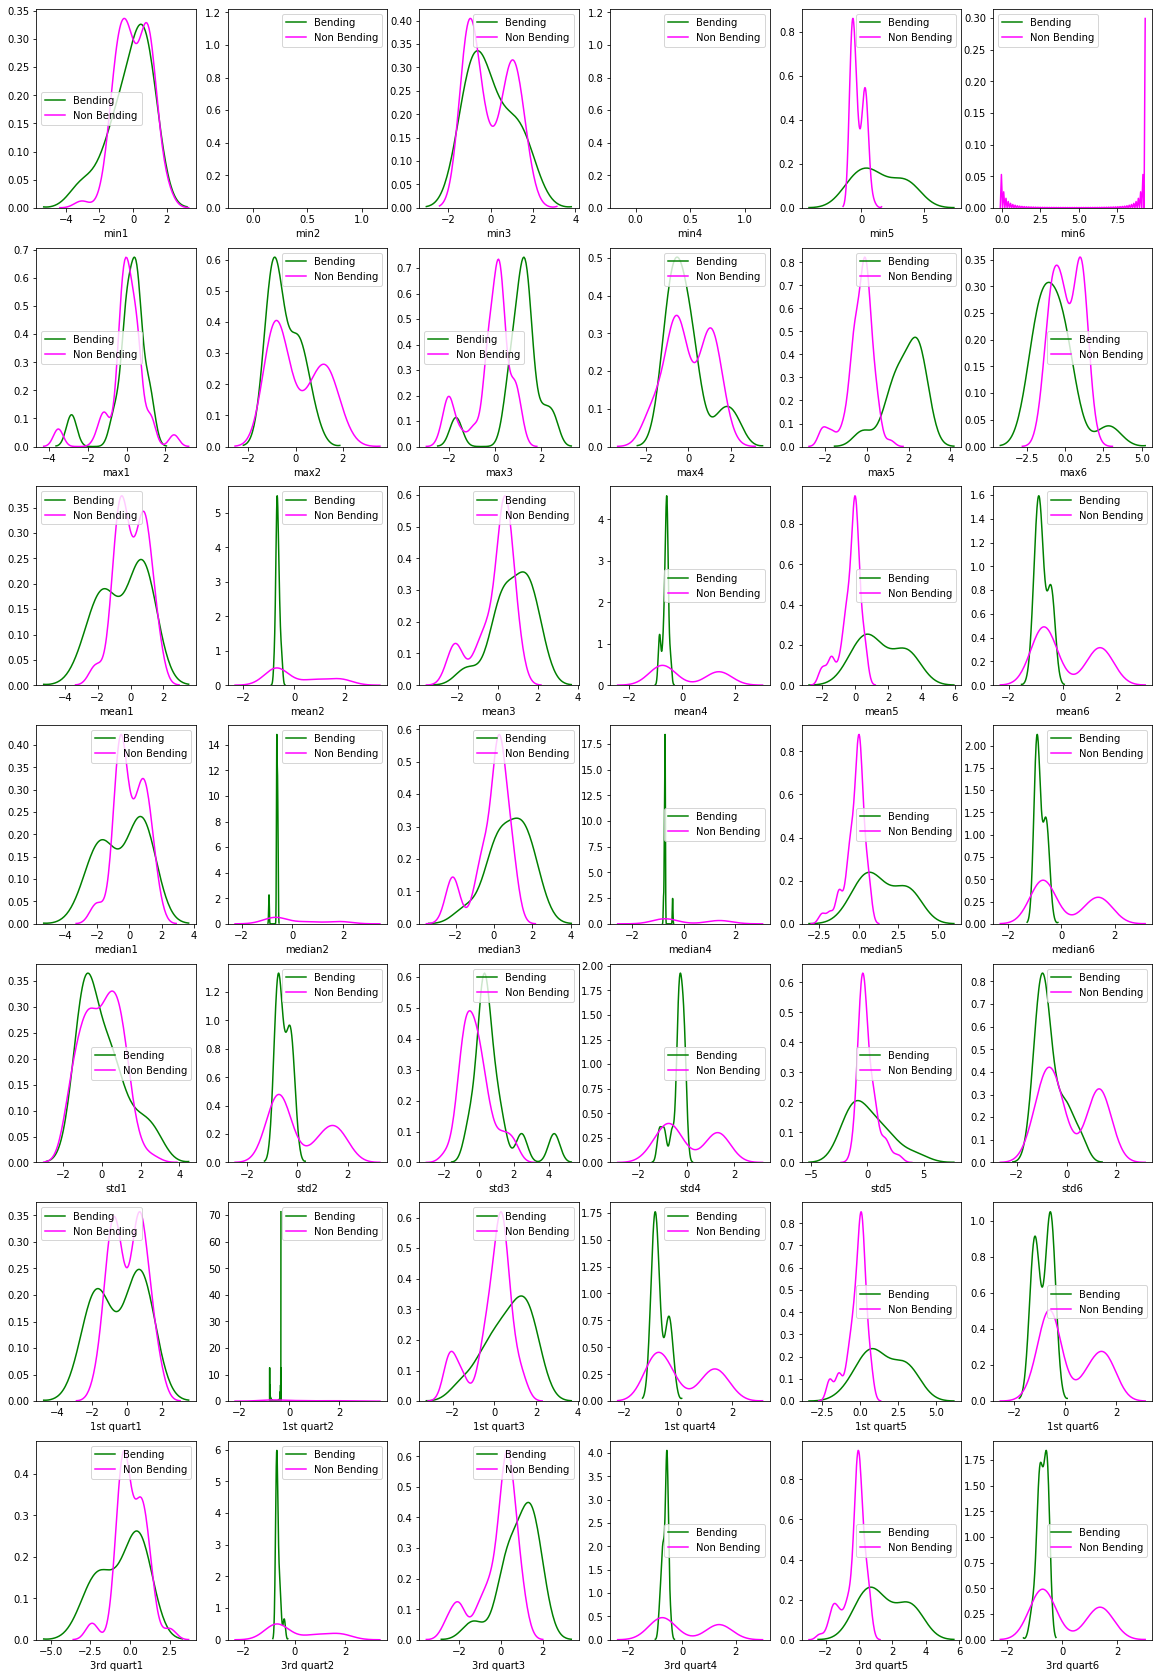

In [12]:
bending_s = scaled_df[scaled_df['class'] == 1]
nonbending_s = scaled_df[scaled_df['class'] == 0]
# features = ["min","max","mean","median","std","1st quart","3rd quart"]
fig,axes = plt.subplots(nrows=7,ncols=6,figsize=(20,30))
for j in range(6):
    for i in range(len(features)):
        ax = axes[i,j]
        string = features[i]+str(j+1)
        b_s = np.array(bending_s[string])
        nb_s = np.array(nonbending_s[string])
        sns.distplot(b_s,hist=False,color='green',kde=True,rug=False,ax=axes[i,j],label='Bending');
        sns.distplot(nb_s,hist=False,color='magenta',kde=True,rug=False,ax=axes[i,j],label='Non Bending');
        ax.set(xlabel=string)
plt.show()

In [13]:
b_s

array([-0.55621088, -0.55621088, -0.79384757, -0.75424145, -1.08429241,
       -0.8400547 , -0.86645878, -0.8400547 , -0.55621088, -0.55621088,
       -0.79384757, -0.55621088, -0.55621088])

In [14]:
test_data= pd.concat([df[0:2], df[7:9], df[13:16], df[28:31], df[43:46], df[58:61], df[73:76]])
train_data= pd.concat([df[2:7], df[9:13], df[16:28], df[31:43], df[46:58], df[61:73], df[76:88]])
train_scaled= pd.concat([scaled_df[2:7], scaled_df[9:13], scaled_df[16:28], scaled_df[31:43], scaled_df[46:58], scaled_df[61:73], scaled_df[76:88]])


In [15]:
bd_train = train_data[train_data['class'] == 1]
nbd_train = train_data[train_data['class'] == 0]

bd_train

,min1,max1,mean1,median1,std1,1st quart1,3rd quart1,min2,max2,mean2,...,1st quart5,3rd quart5,min6,max6,mean6,median6,std6,1st quart6,3rd quart6,class
2,35.00,47.40,43.954500,44.33,1.558835,43.0000,45.0000,0.0,1.70,0.426250,...,35.3625,36.5000,0.0,1.79,0.493292,0.43,0.513506,0.00,0.94,1
3,33.00,47.75,42.179813,43.50,3.670666,39.1500,45.0000,0.0,3.00,0.696042,...,30.4575,36.3300,0.0,2.18,0.613521,0.50,0.524317,0.00,1.00,1
4,33.00,45.75,41.678063,41.75,2.243490,41.3300,42.7500,0.0,2.83,0.535979,...,28.4575,31.2500,0.0,1.79,0.383292,0.43,0.389164,0.00,0.50,1
5,37.00,48.00,43.454958,43.25,1.386098,42.5000,45.0000,0.0,1.58,0.378083,...,22.2500,24.0000,0.0,5.26,0.679646,0.50,0.622534,0.43,0.87,1
6,36.25,48.00,43.969125,44.50,1.618364,43.3100,44.6700,0.0,1.50,0.413125,...,20.5000,23.7500,0.0,2.96,0.555313,0.49,0.487826,0.00,0.83,1
9,21.00,50.00,32.586208,33.00,6.238143,26.1875,34.5000,0.0,9.90,0.516125,...,17.6700,23.5000,0.0,13.61,1.162042,0.83,1.332980,0.47,1.30,1
10,27.50,33.00,29.881938,30.00,1.153837,29.0000,30.2700,0.0,1.00,0.256438,...,17.0000,19.0000,0.0,6.40,0.701625,0.71,0.481103,0.47,0.94,1
11,19.00,45.50,30.938104,29.00,7.684146,26.7500,38.0000,0.0,6.40,0.467167,...,15.0000,20.8125,0.0,6.73,1.107354,0.83,1.080842,0.47,1.30,1
12,25.00,47.50,31.058250,29.71,4.829794,27.5000,31.8125,0.0,6.38,0.405458,...,9.0000,18.3125,0.0,4.92,1.098104,0.94,0.831480,0.50,1.30,1


For all the plots below, I did these because I'm not quite sure if i should be showing pairwise relationship or not. But they all kind of provide me a better view of how these features can classify bending or non-bennding. I plotted both scaled and non-scaled features after picking out mean, median, and 3rd quartile. The distribution plots above were used to see which feature I should pick.

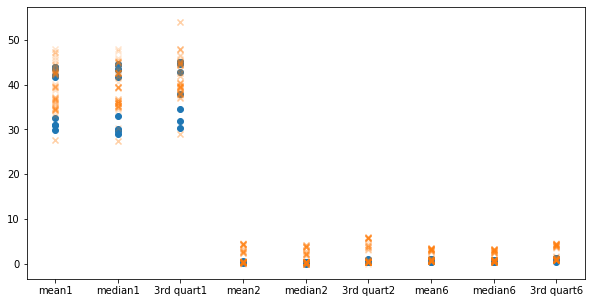

In [17]:
ef_names = ["mean","median","3rd quart"]
names = ["mean1","median1","3rd quart1","mean2","median2","3rd quart2","mean6","median6","3rd quart6"]
s_t = [1,2,6]
b1=[]
nb1=[]
for name in names:
    bd=bd_train[name]
    nbd=nbd_train[name]
    b1.append(bd)
    nb1.append(nbd)

bd1=pd.DataFrame(b1)
n_bd1=pd.DataFrame(nb1)

fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(bd1.index.values.repeat(len(bd1.columns)), bd1.values.ravel(), marker = 'o', )
ax.scatter(n_bd1.index.values.repeat(len(n_bd1.columns)), n_bd1.values.ravel(), marker= 'x', alpha=0.2)
plt.show()


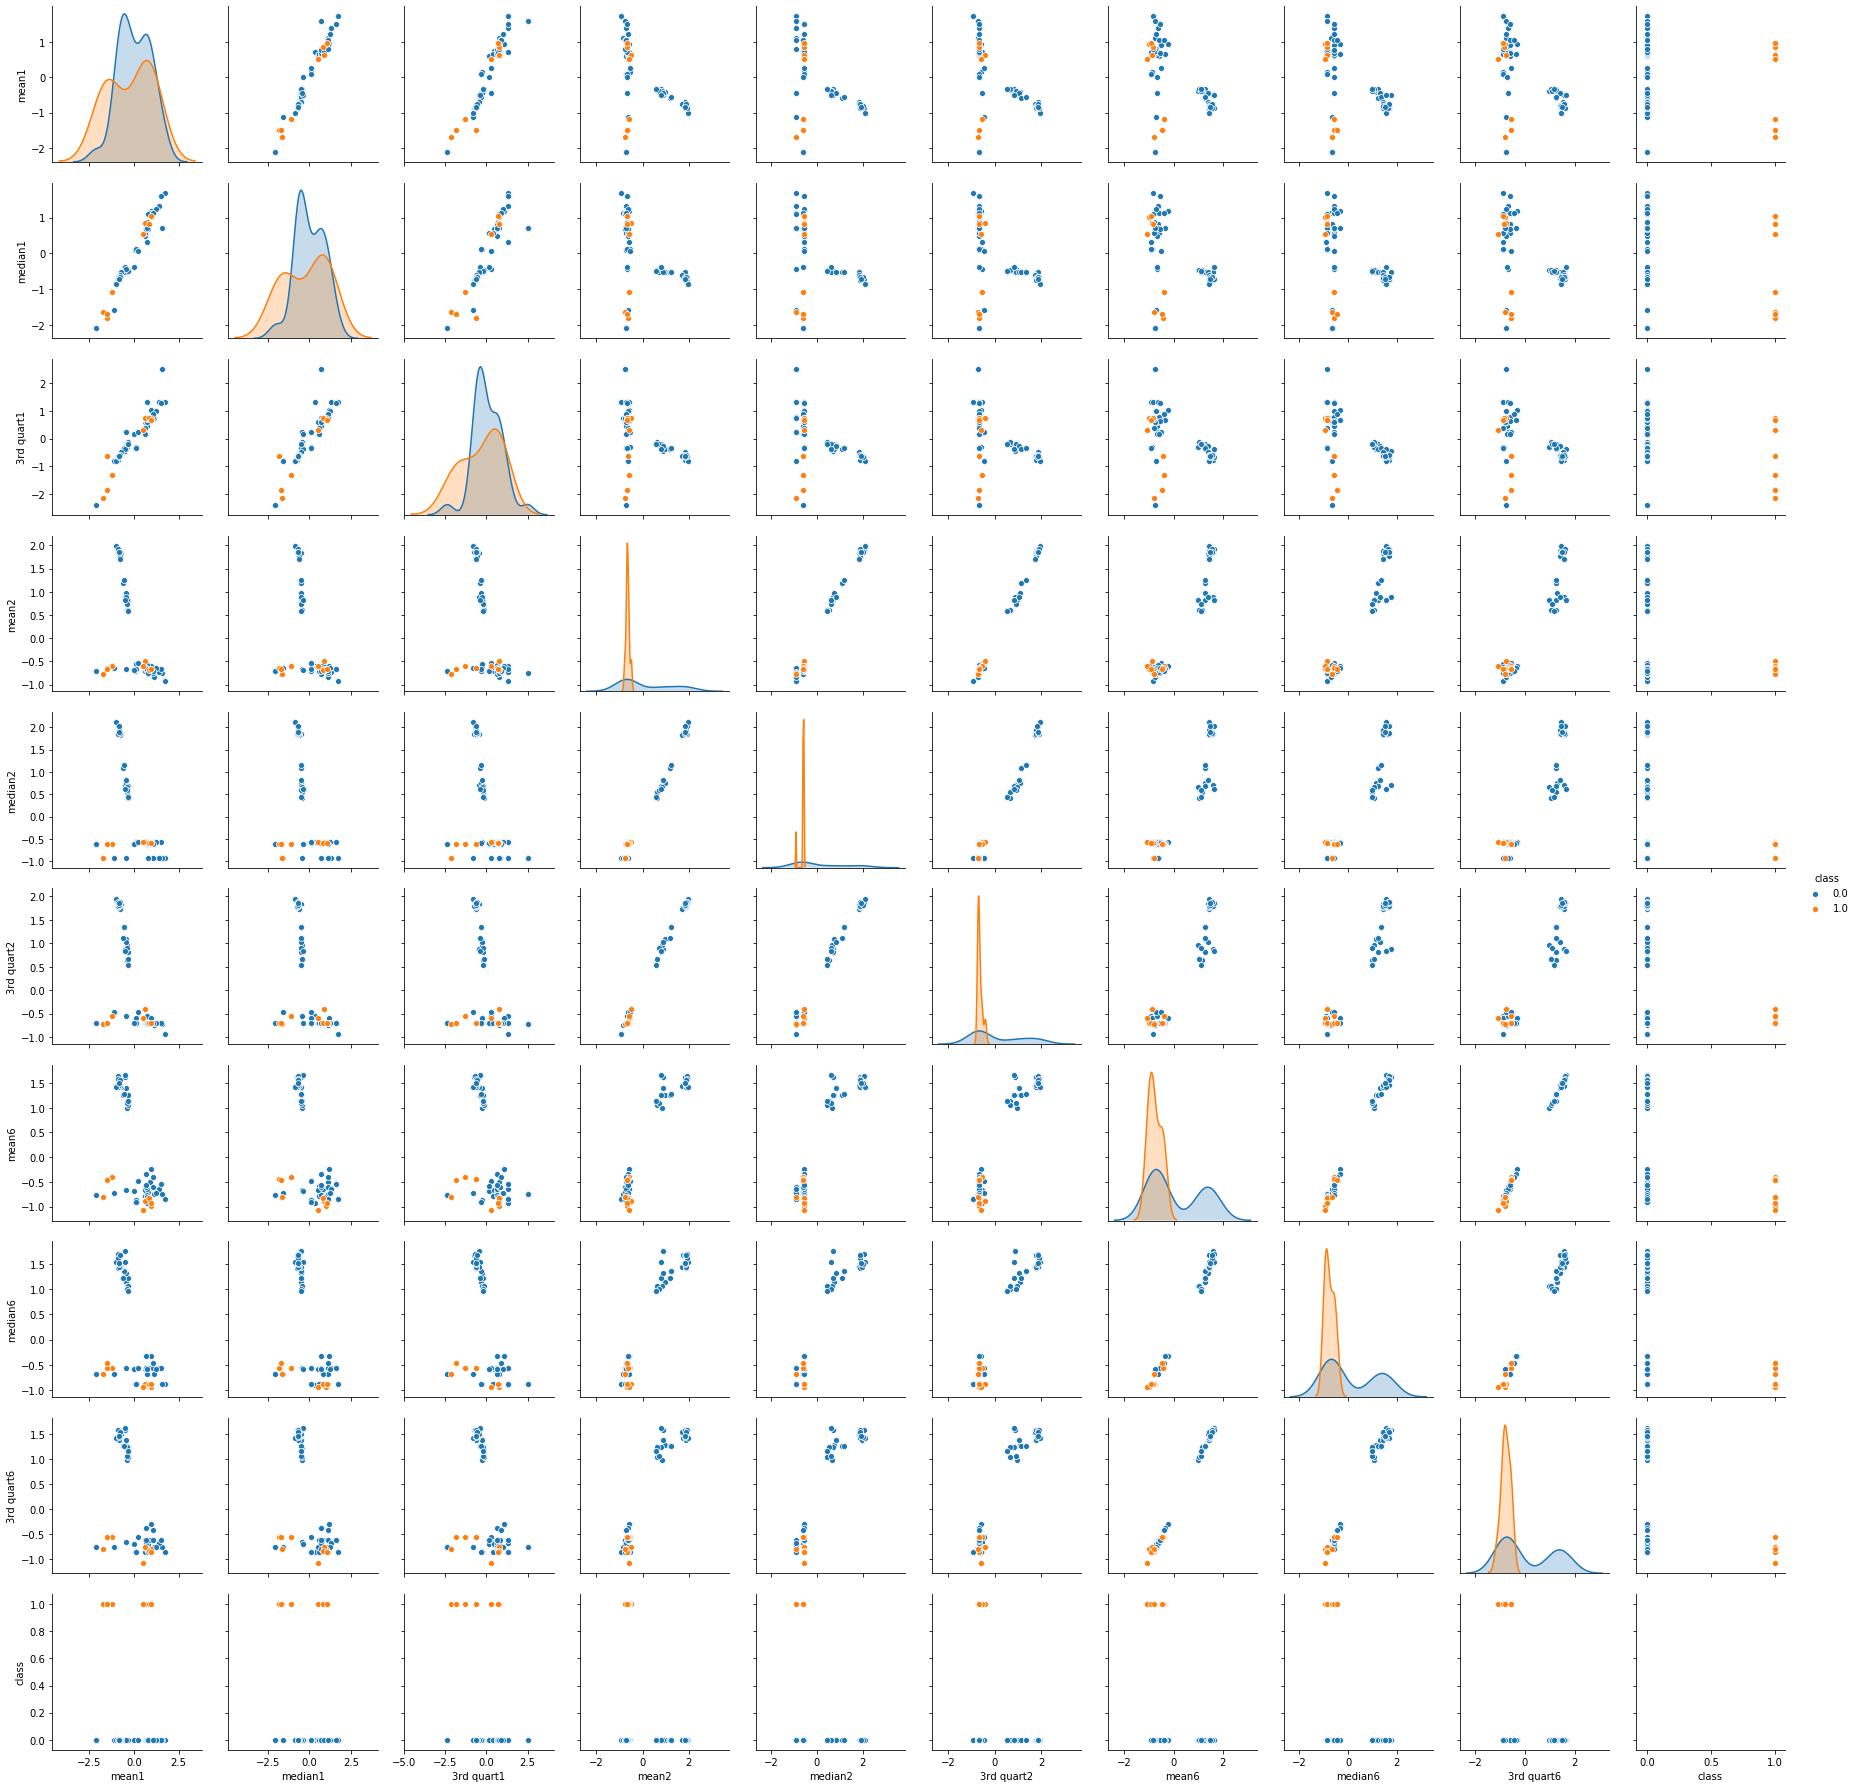

In [18]:
bending1 = train_scaled[train_scaled['class'] == 1]
nonbending1 = train_scaled[train_scaled['class'] == 0]
names1 = ["mean1","median1","3rd quart1","mean2","median2","3rd quart2","mean6","median6","3rd quart6", "class"]
t_s=[]
for name in names1:
    t_s.append(train_scaled[name])
t_s_1=pd.DataFrame(t_s)
t=t_s_1.transpose()

sns.pairplot(t, hue='class')
plt.show()


In [219]:
print(np.array_split(train_instances[1]['time'],2))
# test numpy splits

[0          0
1        250
2        500
3        750
4       1000
5       1250
6       1500
7       1750
8       2000
9       2250
10      2500
11      2750
12      3000
13      3250
14      3500
15      3750
16      4000
17      4250
18      4500
19      4750
20      5000
21      5250
22      5500
23      5750
24      6000
25      6250
26      6500
27      6750
28      7000
29      7250
       ...  
210    52500
211    52750
212    53000
213    53250
214    53500
215    53750
216    54000
217    54250
218    54500
219    54750
220    55000
221    55250
222    55500
223    55750
224    56000
225    56250
226    56500
227    56750
228    57000
229    57250
230    57500
231    57750
232    58000
233    58250
234    58500
235    58750
236    59000
237    59250
238    59500
239    59750
Name: time, Length: 240, dtype: int64, 240     60000
241     60250
242     60500
243     60750
244     61000
245     61250
246     61500
247     61750
248     62000
249     62250
250     62500
251     62750

In [221]:
data = []
for i in range(len(train_instances)):
    data_ = []
    for j in range(1,len(columns)):
        split = np.array_split(train_instances[i][columns[j]],2)
        for k in range(len(split)):
            mean = np.mean(split[k])
            median= np.median(split[k])
            third_qrt = np.quantile(split[k],0.75)
            data_.append(mean)
            data_.append(median)
            data_.append(third_qrt)
    data.append(data_)
col_names = []
for k in range(1,7):
    for i in range(1,3):
        for j in range(len(ef_names)):
            ef = ef_names[j] + str(k) + "_" + str(i)
            col_names.append(ef)
data2=pd.DataFrame(data,columns=col_names)

data2_s = pd.DataFrame(scaler.fit_transform(data2),columns=col_names)

data2['class'] = None
data2_s['class'] = None
for i in range(len(data2)):
    if i<=8:
        data2.at[i, 'class'] = 1
    else:
        data2.at[i, 'class']=0
for i in range(len(data2_s)):
    if i<=8:
        data2_s.at[i, 'class'] = 1
    else:
        data2_s.at[i, 'class']=0
data2_s


,mean1_1,median1_1,3rd quart1_1,mean1_2,median1_2,3rd quart1_2,mean2_1,median2_1,3rd quart2_1,mean2_2,...,mean5_2,median5_2,3rd quart5_2,mean6_1,median6_1,3rd quart6_1,mean6_2,median6_2,3rd quart6_2,class
0,1.049860,1.018302,0.971610,0.921703,0.767664,0.837410,-0.707572,-0.602820,-0.716662,-0.653224,...,3.796393,3.836709,3.642005,-0.907324,-0.889988,-0.773026,-1.063127,-1.338715,-0.927471,1
1,0.890510,1.110810,1.031441,0.386310,0.498029,0.731761,-0.524712,-0.592446,-0.484624,-0.497422,...,3.019286,2.765731,3.139739,-0.870483,-0.647986,-0.629572,-0.894890,-0.915262,-0.824057,1
2,0.551113,0.616816,0.792118,0.512699,0.408151,0.203513,-0.556127,-0.582071,-0.563517,-0.667450,...,2.755492,2.638211,2.499350,-1.061879,-0.953913,-0.962124,-1.097866,-0.951300,-1.063202,1
3,1.062119,1.110810,0.971610,0.717104,0.618466,0.414812,-0.789538,-0.927886,-0.716662,-0.631386,...,1.409629,1.391773,1.130674,-0.719989,-0.698213,-0.694778,-0.930799,-0.888233,-0.927471,1
4,0.932960,0.872138,0.851949,1.037667,0.947420,0.784585,-0.709058,-0.602820,-0.716662,-0.668263,...,1.217452,1.104133,1.080447,-0.970620,-0.917384,-0.883876,-0.895173,-0.888233,-0.849910,1
5,-1.415823,-2.381377,0.253640,-1.144414,-1.119778,-1.539704,-0.578157,-0.602820,-0.716662,-0.670284,...,0.541483,0.480914,0.377275,-0.096629,-0.392286,-0.088359,-0.724774,-0.699031,-0.778813,1
6,-1.682391,-1.610783,-2.259258,-1.937835,-1.838804,-2.437725,-0.758931,-0.630486,-0.716662,-0.815456,...,0.520010,0.480914,0.226595,-0.797698,-0.698213,-0.812149,-0.816762,-0.699031,-0.778813,1
7,-1.994121,-2.219488,-1.182302,-1.235551,-1.659047,0.203513,-0.634991,-0.630486,-0.575119,-0.674746,...,0.578188,0.049455,1.381807,-0.474678,-0.597759,-0.629572,-0.444981,-0.554876,-0.546132,1
8,-0.986630,-1.571930,-0.375183,-2.139849,-2.093159,-2.543374,-0.615308,-0.602820,-0.563517,-0.772306,...,-0.959696,-0.765524,-0.878391,-0.563996,-0.588627,-0.610010,-0.372631,-0.437751,-0.475035,1
9,-0.562282,-0.600593,-0.509204,-0.542469,-0.580509,-0.377559,0.776919,0.742399,0.711534,0.882748,...,0.105943,0.097394,0.110069,1.583779,1.685280,1.543429,1.563162,1.670505,1.526995,0


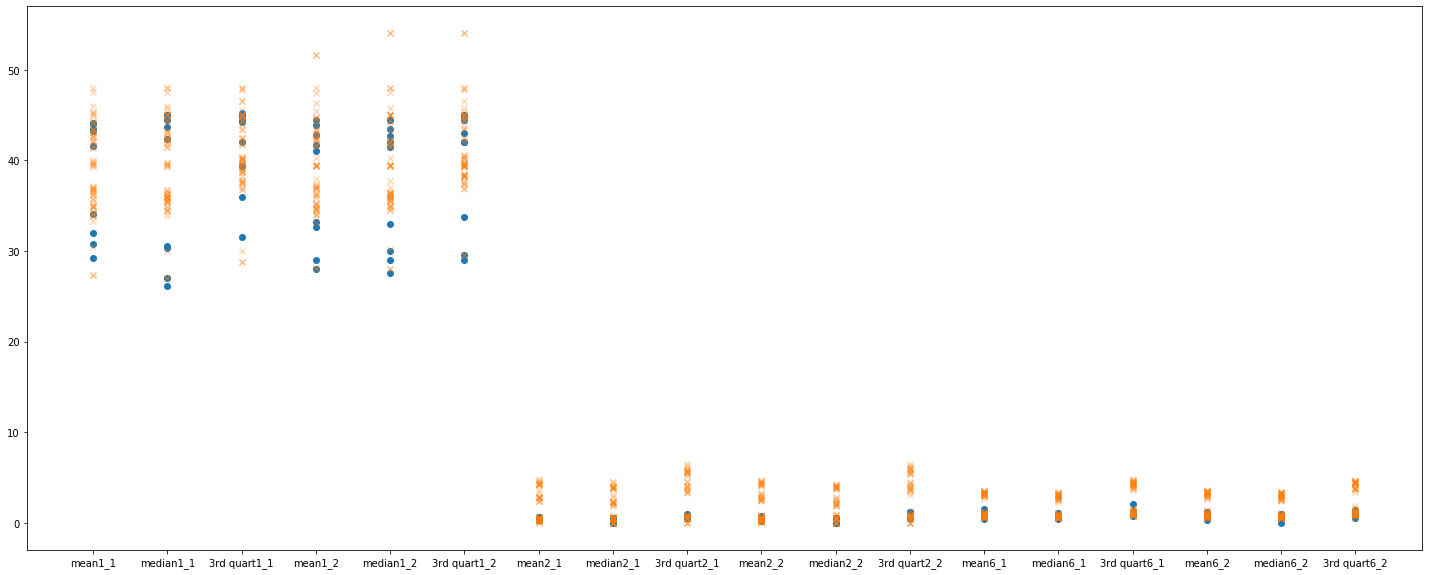

In [222]:
bd_2 = data2[data2['class'] == 1]
nbd_2 = data2[data2['class'] == 0]
b_d=[]
n_bd=[]
ts_126=[]
for i in range(len(s_t)):
    for k in range(1,3):
        for j in range(len(ef_names)):
            strings=ef_names[j] + str(s_t[i])+ "_" + str(k)
            ts_126.append(strings)
            b_d.append(bd_2[strings])
            n_bd.append(nbd_2[strings])
b_d=pd.DataFrame(b_d)
n_bd=pd.DataFrame(n_bd)
n_bd
fig, ax = plt.subplots(figsize=(25, 10))
ax.scatter(b_d.index.values.repeat(len(b_d.columns)), b_d.values.ravel(), marker = 'o')
ax.scatter(n_bd.index.values.repeat(len(n_bd.columns)), n_bd.values.ravel(), marker= 'x', alpha=0.3)
plt.show()

I dont really see much of a difference. Splitting the time series doesn't result in a big change, but instead we can observe somewhat similar patterns

In [223]:
ts_2=[]
ts_2.append(data2_s['class'])
for ts_126 in ts_126:
    ts_2.append(data2_s[ts_126])
ts_2=pd.DataFrame(ts_2)
ts_2

,0,1,2,3,4,5,6,7,8,9,...,59,60,61,62,63,64,65,66,67,68
class,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
mean1_1,1.049860,0.890510,0.551113,1.062119,0.932960,-1.415823,-1.682391,-1.994121,-0.986630,-0.562282,...,-0.858375,-1.032526,-0.838020,-0.941850,-1.028261,-1.145536,-1.001755,-1.002344,-0.820753,-0.821572
median1_1,1.018302,1.110810,0.616816,1.110810,0.872138,-2.381377,-1.610783,-2.219488,-1.571930,-0.600593,...,-0.646847,-0.854991,-0.600593,-0.793010,-0.831864,-0.924372,-0.847590,-0.739356,-0.678300,-0.669974
3rd quart1_1,0.971610,1.031441,0.792118,0.971610,0.851949,0.253640,-2.259258,-1.182302,-0.375183,-0.509204,...,-0.763486,-0.823316,-0.538521,-0.813145,-0.928021,-0.987851,-0.763486,-0.823316,-0.748528,-0.643824
mean1_2,0.921703,0.386310,0.512699,0.717104,1.037667,-1.144414,-1.937835,-1.235551,-2.139849,-0.542469,...,-0.762532,-0.831112,-0.911551,-0.958090,-0.865865,-1.012799,-0.864127,-0.777216,-0.822217,-0.976026
median1_2,0.767664,0.498029,0.408151,0.618466,0.947420,-1.119778,-1.838804,-1.659047,-2.093159,-0.580509,...,-0.655108,-0.760265,-0.760265,-0.805204,-0.647918,-0.850144,-0.670387,-0.602979,-0.715326,-0.850144
3rd quart1_2,0.837410,0.731761,0.203513,0.414812,0.784585,-1.539704,-2.437725,0.203513,-2.543374,-0.377559,...,-0.575652,-0.588858,-0.747333,-0.800157,-0.584632,-0.852982,-0.588858,-0.571954,-0.584632,-0.641683
mean2_1,-0.707572,-0.524712,-0.556127,-0.789538,-0.709058,-0.578157,-0.758931,-0.634991,-0.615308,0.776919,...,1.692782,1.764659,1.718070,1.754465,1.944651,1.812133,2.043772,1.916338,1.668145,1.720938
median2_1,-0.602820,-0.592446,-0.582071,-0.927886,-0.602820,-0.602820,-0.630486,-0.630486,-0.602820,0.742399,...,1.859381,1.769469,1.679557,1.755637,2.184447,1.973500,1.859381,2.163698,1.745262,1.734888
3rd quart2_1,-0.716662,-0.484624,-0.563517,-0.716662,-0.716662,-0.716662,-0.716662,-0.575119,-0.563517,0.711534,...,1.696537,1.669853,1.623445,1.644329,1.933216,1.775430,2.070119,1.849683,1.582838,1.565436


<Figure size 4320x4320 with 0 Axes>

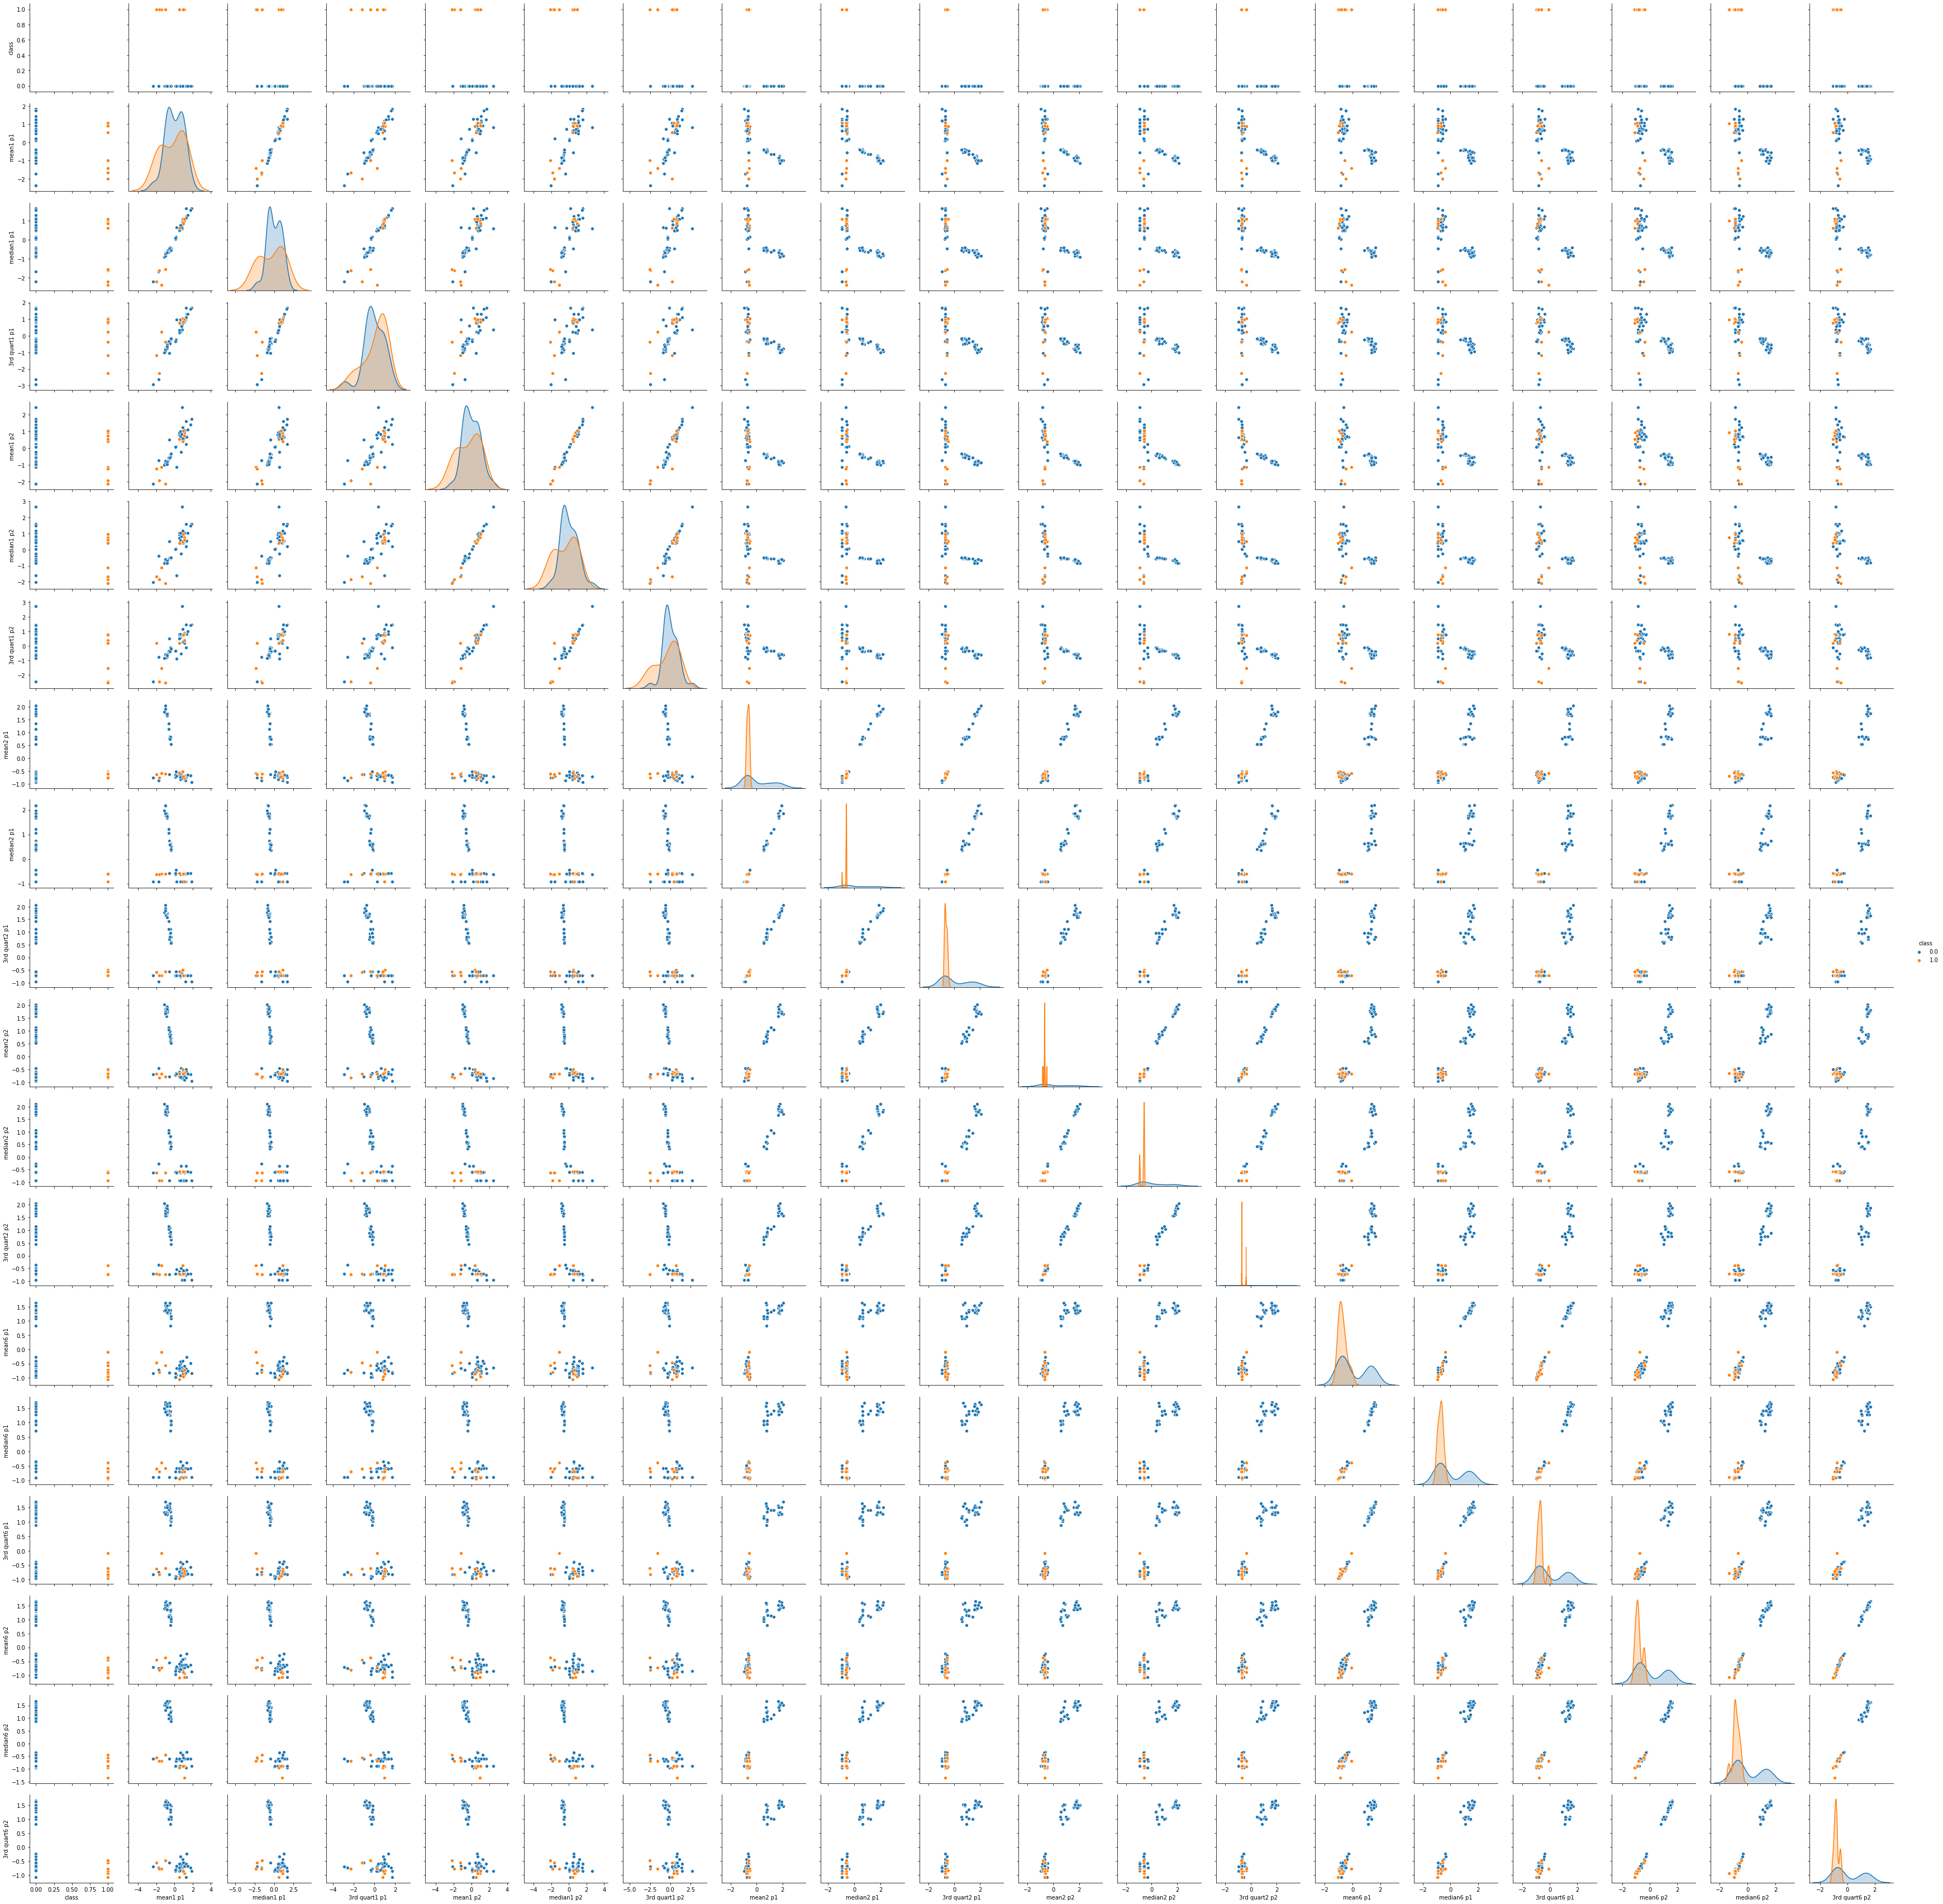

In [108]:
ts2_t= ts_2.transpose()
plt.figure(figsize=(60, 60))
sns.pairplot(ts2_t, hue='class')
plt.show()

In [214]:
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score, confusion_matrix, roc_curve, auc
import statsmodels.api as sm

kf = StratifiedKFold(n_splits=5,shuffle=True)

In [224]:
train_split = []
train_split_s= []
test_split = []
for l in range(1,21):
    data_spl=[]
    for i in range(len(train_instances)):
        data_l = []
        for j in range(1,len(columns)):
            splits = np.array_split(train_instances[i][columns[j]],l)
            for k in range(len(splits)):
                mean = np.mean(splits[k])
                median= np.median(splits[k])
                third_qrt = np.quantile(splits[k],0.75)
                data_l.append(mean)
                data_l.append(median)
                data_l.append(third_qrt)
        data_spl.append(data_l)
    names_l = []
    for k in range(1,7):
        for i in range(1,l+1):
            if l==1:
                for j in range(len(ef_names)):
                    ef_ = ef_names[j] + str(k) 
                    names_l.append(ef_)
            else:
                for j in range(len(ef_names)):
                    ef_l = ef_names[j] + str(k) + "_" + str(i)
                    names_l.append(ef_l)
#     print(names_l)
    
    train_l=pd.DataFrame(data_spl,columns=names_l)
    train_s_l= pd.DataFrame(scaler.fit_transform(train_l),columns=names_l)

    train_l['class'] = None
    train_s_l['class'] = None
    for i in range(len(train_l)):
        if i<=8:
            train_l.at[i, 'class'] = 1
        else:
            train_l.at[i, 'class']=0
    for i in range(len(train_s_l)):
        if i<=8:
            train_s_l.at[i, 'class'] = 1
        else:
            train_s_l.at[i, 'class']=0
    train_l= train_l.reset_index(drop=True)
    train_s_l= train_s_l.reset_index(drop=True)
    train_split.append(train_l)
    train_split_s.append(train_s_l)


The right way to perform cross-validation is to extract and select features after cross-validating (or while doing it in order to compare which set of l and p are the best), or else the model will be overly possitive. The wrong way is to do the opposite of that, to select features first or keep the features constant through out. This will lead to the training set seeing the validation data, which results in overly positive model.

In [225]:
train_split

[        mean1  median1  3rd quart1     mean2  median2  3rd quart2      mean3  \
 0   43.954500   44.330     45.0000  0.426250    0.470      0.5000  22.122354   
 1   42.179813   43.500     45.0000  0.696042    0.500      1.1200  22.183625   
 2   41.678063   41.750     42.7500  0.535979    0.500      0.7100  19.006562   
 3   43.454958   43.250     45.0000  0.378083    0.470      0.5000  15.793333   
 4   43.969125   44.500     44.6700  0.413125    0.470      0.5000  15.868021   
 5   32.586208   33.000     34.5000  0.516125    0.430      0.8225  13.941625   
 6   29.881938   30.000     30.2700  0.256438    0.000      0.4700   8.166250   
 7   30.938104   29.000     38.0000  0.467167    0.430      0.5000  14.589833   
 8   31.058250   29.710     31.8125  0.405458    0.430      0.5000  15.296667   
 9   36.228396   36.000     39.0000  2.831687    2.285      3.8450  15.424500   
 10  36.687292   36.000     39.3725  2.973042    2.360      4.2625  18.396792   
 11  37.114312   36.250     

ISLR 3.7.4

Cubic regression is more flexible than linear regression, therefore will almost always fit data better than linear regression

a) Train RSS for cubic regression will definitely be lower as it will fit(overfit) the data more 

b) X and Y true relationship is linear. That means that the test RSS for cubic reg will be higher than linear reg.

c) Again, train RSS for cubic reg will be lower since it's a more flexible model than linear.

d) The test RSS for linear reg will be lower if the relationship is closer to linear, and higher if it's closer to a polynomial regression (meaning test RSS for cubic reg will be lower in this case) 

In [226]:
for l in range(1,21):
    test_spl=[]
    for i in range(len(test_instances)):
        test_ = []
        for j in range(1,len(columns)):
            t_splits = np.array_split(train_instances[i][columns[j]],l)
            for k in range(len(t_splits)):
                mean = np.mean(t_splits[k])
                median= np.median(t_splits[k])
                third_qrt = np.quantile(t_splits[k],0.75)
                test_.append(mean)
                test_.append(median)
                test_.append(third_qrt)
        test_spl.append(test_)
    names_l = []
    for k in range(1,7):
        for i in range(1,l+1):
            if l==1:
                for j in range(len(ef_names)):
                    ef_ = ef_names[j] + str(k) 
                    names_l.append(ef_)
            else:
                for j in range(len(ef_names)):
                    ef_l = ef_names[j] + str(k) + "_" + str(i)
                    names_l.append(ef_l)
    
    test_l=pd.DataFrame(test_spl,columns=names_l)

    test_l['class'] = None
    for i in range(len(test_l)):
        if i<=8:
            test_l.at[i, 'class'] = 1
        else:
            test_l.at[i, 'class']=0
    test_l= test_l.reset_index(drop=True)
    test_split.append(test_l)


In [227]:
test_split

[        mean1  median1  3rd quart1     mean2  median2  3rd quart2      mean3  \
 0   43.954500    44.33     45.0000  0.426250    0.470      0.5000  22.122354   
 1   42.179813    43.50     45.0000  0.696042    0.500      1.1200  22.183625   
 2   41.678063    41.75     42.7500  0.535979    0.500      0.7100  19.006562   
 3   43.454958    43.25     45.0000  0.378083    0.470      0.5000  15.793333   
 4   43.969125    44.50     44.6700  0.413125    0.470      0.5000  15.868021   
 5   32.586208    33.00     34.5000  0.516125    0.430      0.8225  13.941625   
 6   29.881938    30.00     30.2700  0.256438    0.000      0.4700   8.166250   
 7   30.938104    29.00     38.0000  0.467167    0.430      0.5000  14.589833   
 8   31.058250    29.71     31.8125  0.405458    0.430      0.5000  15.296667   
 9   36.228396    36.00     39.0000  2.831687    2.285      3.8450  15.424500   
 10  36.687292    36.00     39.3725  2.973042    2.360      4.2625  18.396792   
 11  37.114312    36.25     

In [229]:
x_tr = train_split[0].copy()
y_tr = x_tr.pop('class')
logr = LogisticRegression(max_iter=10,C=10000)
lp_pair=[]
pred_test_full =0
cv_score =[]
i=1
kf.split(x_tr,y_tr)
# train_index
# for train_index,test_index in kf.split(x_tr,y_tr):
    
#     print('{} of KFold {}'.format(i,kf.n_splits))
#     xtr,xvl = X.loc[train_index],X.loc[test_index]
#     ytr,yvl = y.loc[train_index],y.loc[test_index]
    
#     logr.fit(x_tr,y_tr)
#     score = roc_auc_score(yvl,lr.predict(xvl))
#     print('ROC AUC score:',score)
#     cv_score.append(score)    
#     pred_test = lr.predict_proba(test_split)[:,1]
#     pred_test_full +=pred_test
    
#     i+=1
# print('Confusion matrix\n',confusion_matrix(yvl,lr.predict(xvl)))
# print('Cv',cv_score,'\nMean cv Score',np.mean(cv_score))
#code based on https://www.kaggle.com/sudhirnl7/logistic-regression-with-stratifiedkfold

<generator object _BaseKFold.split at 0x1ab3f76d68>

In [230]:
y_tr

0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
     ..
39    0
40    0
41    0
42    0
43    0
44    0
45    0
46    0
47    0
48    0
49    0
50    0
51    0
52    0
53    0
54    0
55    0
56    0
57    0
58    0
59    0
60    0
61    0
62    0
63    0
64    0
65    0
66    0
67    0
68    0
Name: class, Length: 69, dtype: object

I kind of gave up as I'm still not sure how to run the kfold cross validation through all the times series with splits. I will work on this by myself after the midterm. Also note to self, to give myself more time to work on homework 4 and future ones